## 4-Corners Fruitland Outcrop Methane Flux Data Analysis
La Plata County, Colorado

2012 - 2020 Monitoring Data

Amy Voit - amy.voit@du.edu

### Background Information

The Fruitland Formation is a geologic formation located in the San Juan Basin, primarily spanning parts of southwestern Colorado and northwestern New Mexico (See Figure 1 below from Petron et al 2020). This formation dates back to the Late Cretaceous period and is known for its rich deposits of coal and, as a byproduct, methane gas. The Fruitland Formation is particularly notable in La Plata County, Colorado, where it forms a prominent outcrop along the northern rim of the basin. The outcrop extends approximately 23 miles from the northern boundary of the Southern Ute Indian Tribe Reservation near Basin Creek to the boundary between La Plata and Archuleta counties (WSP 2021). This outcrop has been the focus of monitoring since the mid-1990s when the methane seepage seemed to be increasing along the outcrop with the increase in oil & gas activity within the basin (BLM 1999).

<div style = "text-align: center;">
    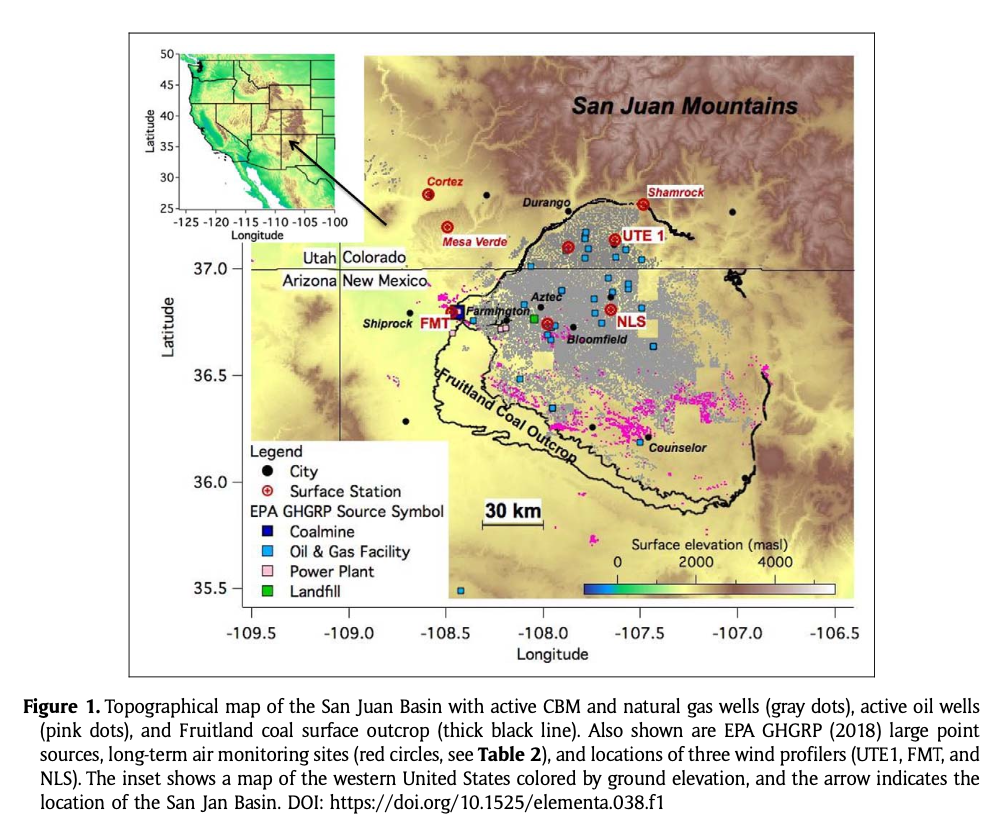
</div>

Since the 1990s, various investigations and studies have documented the methane problem in the San Juan Basin. Notable among them was the 2014 study by Kort et al. (2014), which published satellite data measuring an anomolously large amount of methane over the San Juan Basin, dubbed the "Four Corners Methane Hot Spot" (see Figure 2 below from Kort et a. 2014). 
<div style = "text-align: center;">
    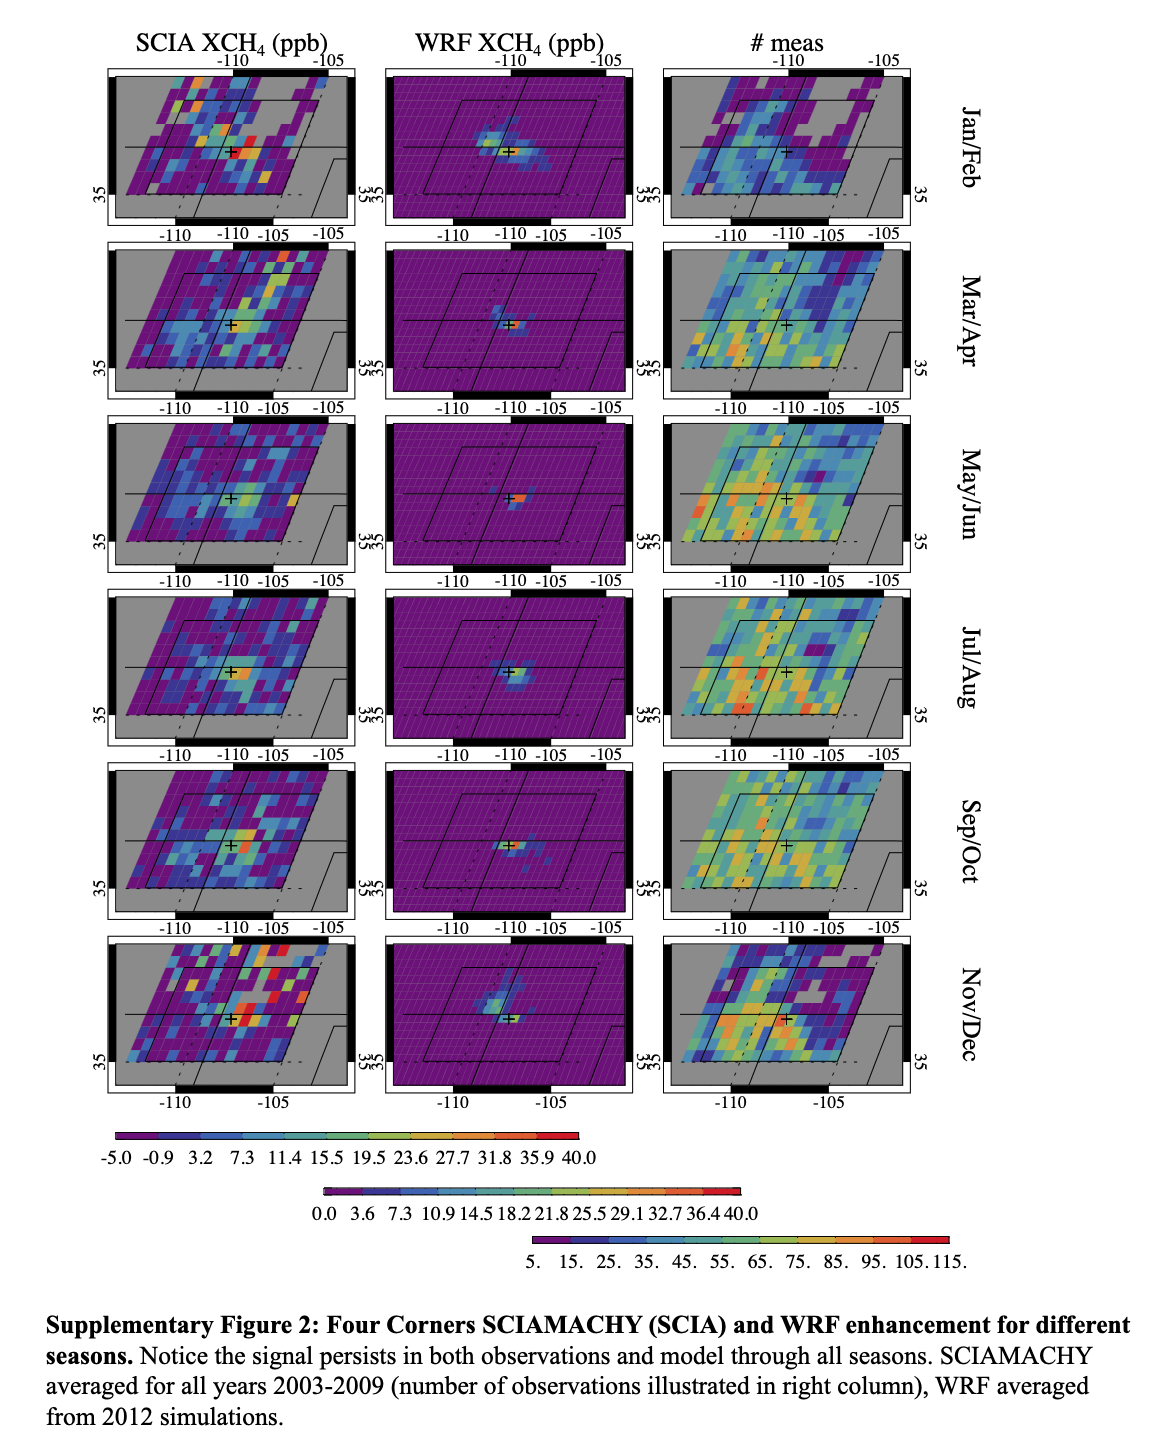
</div>
Methane is a potent greenhouse gas with a shorter atmospheric lifespan than carbon dioxide (CO2) but has a Global Warming Potential (100-year) of 28 times that of CO2 (EPA 2024). Due to this multiplier effect in driving climate change, methane reductions have become a major focus of regulations, environmental groups, finance, and industry. Recognizing this, the Southern Ute Tribe in the Four Corners Region has initiated a project to collect the methane being released from these seeps on their lands (https://native.eco/project/southern-ute-indian-tribe-natural-methane-capture-and-use/  and https://coyote.energy/). The success of such a project depends on accurately measuring and predicting the rate at which methane can be successfully collected and converted into power. This project will rely on data collected by various groups in the region on seep loss and hot spots. 

One such group is the Fruitland Outcrop Methane Flux Project, initiated by the Colorado Oil and Gas Conservation Commission, now known as the ECMC. This monitoring began in the late 1990s and has continued annually. Their reports and data are published on the ECMC website under the 3M Project in the San Juan Basin:

https://ecmc.state.co.us/library.html#/areareports

These reports include tables of annual methane, CO2, and hydrogen sulfide (H2S) flux measurements, detailing the measurement site name, location, and date. The period from 2012 - 2020 provides particularly useful data since the same locations were measured yearly. Other than a 3M Hydrologic model &  a Coalbed Methane (CMB) model developed in 2000, the data has not been comprehensively analyzed since. Additionally, there has been no recent comparison of flux rates to oil & gas drilling activity in the region nor precipitation rates, both of which are believed to be potential drivers of methane seep flux rates (BLM 1999).

This data analysis will examine the 2012 - 2020 methane flux measurment data in conjunction with drill rig counts in the San Juan Basin & precipitation rates. It will also analyze several different models in their efficacy to predict future methane flux rates in the region.

### Methane Data Source Ingestion & Cleanup

In [1]:
import pandas as pd
import numpy as np

**Loading Methane Data**

In [2]:
#Loading Methane Datasets
methane_2012 = pd.read_csv('data/2012.csv')
methane_2013 = pd.read_csv('data/2013.csv')
methane_2015 = pd.read_csv('data/2015.csv')
methane_2016 = pd.read_csv('data/2016.csv')
methane_2017 = pd.read_csv('data/2017.csv')
methane_2018 = pd.read_csv('data/2018.csv')
methane_2019 = pd.read_csv('data/2019.csv')
methane_2020 = pd.read_csv('data/2020.csv')

**Dealing with Date Time**

In [3]:
#First Dealing with Date Time Individually - since they are all over the place in terms of formatting
methane_2012['Date Time'] = pd.to_datetime(methane_2012['Date Time'], format = '%d‐%m‐%Y %H:%M:%S')
methane_2013['Date Time'] = pd.to_datetime(methane_2013['Date Time'], format = 'mixed')

# Normalize the date strings by replacing en dash with a hyphen
methane_2015['Date Time'] = methane_2015['Date Time'].str.replace('‐', '-', regex=False)
methane_2015['Date Time'] = pd.to_datetime(methane_2015['Date Time'], dayfirst = True)

#The rest were more straightforward
methane_2016['Date Time'] = pd.to_datetime(methane_2016['Date Time'], format = 'mixed')
methane_2017['Date Time'] = pd.to_datetime(methane_2017['Date Time'], format = 'mixed')
methane_2018['Date Time'] = pd.to_datetime(methane_2018['Date Time'], format = 'mixed')
methane_2019['Date Time'] = pd.to_datetime(methane_2019['Date Time'], format = 'mixed')

methane_2020['Date Time'] = pd.to_datetime(methane_2020['Date Time'])

/var/folders/5n/p177y7t11gn_lngf58sm7bpw0000gn/T/ipykernel_40029/2120781622.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  methane_2020['Date Time'] = pd.to_datetime(methane_2020['Date Time'])


In [4]:
#Combine Into Single Dataset
frames = [methane_2012, methane_2013, methane_2015, methane_2016, methane_2017, methane_2018, methane_2019, methane_2020]
df_methane = pd.concat(frames)

In [5]:
df_methane.head()

,Site Pt,Area,Northing,Easting,Date Time,CH4 flux,H2S flux,CO2 flux,Pressure,Temp,CH4 slope,H2S slope,CO2 slope
0,baird125_01,Baird,1230598.374,2330638.039,2012-05-29 09:59:38,0.0,0.000729,0.090353,784.9,29.1,0,0.003,0.372000009
1,baird125_02,Baird,1230640.730,2330642.375,2012-05-29 10:08:57,0.0,0.000482,0.072957,784.8,31.7,0,0.002,0.303000003
2,baird125_03,Baird,1230689.820,2330643.940,2012-05-29 10:13:47,0.0,0.000720,0.054443,784.8,32.9,0,0.003,0.226999998
3,baird125_04,Baird,1230743.238,2330641.499,2012-05-29 10:17:05,0.0,0.001676,0.103886,784.8,33.5,0,0.007,0.433999985
4,baird125_05,Baird,1230792.122,2330641.965,2012-05-29 10:20:14,0.0,0.001434,0.098013,784.8,33.9,0,0.006,0.409999996


In [6]:
#Changing Index to the Date Time so we can do more time series stuff later
df_methane = df_methane.set_index('Date Time')
df_methane.head()

,Site Pt,Area,Northing,Easting,CH4 flux,H2S flux,CO2 flux,Pressure,Temp,CH4 slope,H2S slope,CO2 slope
Date Time,,,,,,,,,,,,
2012-05-29 09:59:38,baird125_01,Baird,1230598.374,2330638.039,0.0,0.000729,0.090353,784.9,29.1,0,0.003,0.372000009
2012-05-29 10:08:57,baird125_02,Baird,1230640.730,2330642.375,0.0,0.000482,0.072957,784.8,31.7,0,0.002,0.303000003
2012-05-29 10:13:47,baird125_03,Baird,1230689.820,2330643.940,0.0,0.000720,0.054443,784.8,32.9,0,0.003,0.226999998
2012-05-29 10:17:05,baird125_04,Baird,1230743.238,2330641.499,0.0,0.001676,0.103886,784.8,33.5,0,0.007,0.433999985
2012-05-29 10:20:14,baird125_05,Baird,1230792.122,2330641.965,0.0,0.001434,0.098013,784.8,33.9,0,0.006,0.409999996


In [7]:
#Also want to add a Year column so that we can reference it later when adding in other info
df_methane['Year'] = df_methane.index.year

In [8]:
#Removing some columns - I really only want to look at the flux & I know that names wasn't something consistently tracked in the datasets
#so I'm removing that from here
df_methane.drop(columns = ['CH4 slope', 'H2S slope', 'CO2 slope'], inplace= True)

**Checking Other Data Types**

In [9]:
df_methane.dtypes

Site Pt      object
Area         object
Northing    float64
Easting     float64
CH4 flux    float64
H2S flux    float64
CO2 flux    float64
Pressure     object
Temp        float64
Year          int32
dtype: object

In [10]:
#Now to cleanup pressure... unsure why it's not a float object
df_methane['Pressure'] = pd.to_numeric(df_methane['Pressure'], errors = 'coerce')

In [11]:
#Also converting Area to a Category
df_methane['Area'] = df_methane['Area'].astype('category')

**Evaluating Missing Data**

In [12]:
#Evaluating NAs
df_methane.isna().sum()

Site Pt      0
Area         0
Northing     4
Easting      4
CH4 flux    10
H2S flux    16
CO2 flux    17
Pressure     4
Temp         0
Year         0
dtype: int64

In [13]:
#There's no point in having NA flux measurments so I'm just going to drop those instances
df_methane = df_methane.dropna(subset = ['CH4 flux'])

In [14]:
#Just checking out what rows are left
na_rows = df_methane[df_methane.isna().any(axis=1)]
na_rows

,Site Pt,Area,Northing,Easting,CH4 flux,H2S flux,CO2 flux,Pressure,Temp,Year
Date Time,,,,,,,,,,
2012-06-11 12:45:39,BC061112_20,BC,1210951.798,2303381.741,0.000000,0.002350,NaN,792.6,42.3,2012
2012-06-12 11:48:29,BC061212_19,BC,1208747.391,2301545.599,0.000000,NaN,NaN,NaN,41.5,2012
2013-07-06 12:15:00,BC060413_123,BC,1208756.127,2300556.881,0.000000,NaN,0.021491,781.1,43.0,2013
2013-11-07 09:34:00,PineRiver071113_01,PR,1238139.913,2386579.199,0.000000,0.003934,NaN,790.8,27.7,2013
2013-06-20 12:44:56,VP061813_119,VP,1240846.255,2341000.323,0.000000,NaN,NaN,762.6,35.3,2013
2015-06-08 14:50:24,BasinCreek06082015_24,BC,1209948.523,2304589.932,0.000000,0.000000,NaN,799.9,44.8,2015
2015-06-08 15:04:05,BasinCreek06082015_26,BC,1210174.598,2304383.975,0.000000,0.000000,NaN,800.9,44.4,2015
2015-06-17 10:34:19,BasinCreek061615_94,BC,1213637.068,2305113.205,15.297900,NaN,2.820740,784.2,40.7,2015
2015-06-18 15:09:17,GunClub061815_31,GC,1215360.965,2310780.930,6.532985,NaN,NaN,808.0,45.3,2015


In [15]:
#I also really want to be able to square up locations based on lat/longs so I'm going to drop those columns with NAs in Northing Easting
df_methane = df_methane.dropna(subset = ['Northing', 'Easting'])

In [16]:
#I think for Nans in H2S flux, CO2 flux and pressure I'm going to impute the average based upon the year.
to_fill = ['H2S flux', 'CO2 flux', 'Pressure']

for c in to_fill:
    df_methane[c] = df_methane.groupby(['Year'])[c].transform(lambda x: x.fillna(x.mean()))

In [17]:
#Final Check
df_methane.isna().sum()

Site Pt     0
Area        0
Northing    0
Easting     0
CH4 flux    0
H2S flux    0
CO2 flux    0
Pressure    0
Temp        0
Year        0
dtype: int64

In [18]:
df_methane.head()

,Site Pt,Area,Northing,Easting,CH4 flux,H2S flux,CO2 flux,Pressure,Temp,Year
Date Time,,,,,,,,,,
2012-05-29 09:59:38,baird125_01,Baird,1230598.374,2330638.039,0.0,0.000729,0.090353,784.9,29.1,2012
2012-05-29 10:08:57,baird125_02,Baird,1230640.730,2330642.375,0.0,0.000482,0.072957,784.8,31.7,2012
2012-05-29 10:13:47,baird125_03,Baird,1230689.820,2330643.940,0.0,0.000720,0.054443,784.8,32.9,2012
2012-05-29 10:17:05,baird125_04,Baird,1230743.238,2330641.499,0.0,0.001676,0.103886,784.8,33.5,2012
2012-05-29 10:20:14,baird125_05,Baird,1230792.122,2330641.965,0.0,0.001434,0.098013,784.8,33.9,2012


### Other Data Injestion & Cleanup

**Rig Data**
The original format of the rig data is weird. It comes from Baker Hughes. Essentially what it is tracking is in a per Basin basis (in this case I already separated out the counties where the Fruitland Formation exists from the original dataset which was massive) how many rigs were out in a given year, month, then week. Really this means we are going to need to group the data to get a real rig count number.

In [19]:
#Rigs
drill_rigs = pd.read_csv('data/Rig Count.csv')

In [20]:
drill_rigs.head()

,Country,County,Basin,DrillFor,Location,Trajectory,WellDepth,Year,Month,Week,RigCount,State/Province,PublishDate
0,UNITED STATES,SAN JUAN,Other,Gas,Land,Directional,5k-10k,2012,1,1,1,NEW MEXICO,1/6/12 0:00
1,UNITED STATES,SAN JUAN,Other,Gas,Land,Directional,5k-10k,2012,1,1,1,NEW MEXICO,1/6/12 0:00
2,UNITED STATES,SAN JUAN,Other,Gas,Land,Horizontal,5k-10k,2012,1,1,1,NEW MEXICO,1/6/12 0:00
3,UNITED STATES,SAN JUAN,Other,Gas,Land,Vertical,<5k,2012,1,1,1,NEW MEXICO,1/6/12 0:00
4,UNITED STATES,SANDOVAL,Other,Oil,Land,Horizontal,5k-10k,2012,1,1,1,NEW MEXICO,1/6/12 0:00


In [21]:
#Groupby week to get the total rigs operating during any given week
d_counts = drill_rigs.groupby(['Year', 'Month', 'Week'])['RigCount'].sum()

In [22]:
#Because Rig Counts Change from Week to Week... let's just look at max number operating in any given month
rig_counts_month = d_counts.groupby(['Year', 'Month']).max()

#And now because what we really are interested in tracking is the yearly data lets group by year
rig_counts_year = rig_counts_month.groupby(['Year']).agg('max').reset_index()

In [23]:
rig_counts_year

,Year,RigCount
0,2012,13
1,2013,10
2,2014,9
3,2015,8
4,2016,2
5,2017,4
6,2018,4
7,2019,3
8,2020,1


**Oil & Gas Production Plus Injection**
Production data comes from both the state of New Mexico & Colorado since the basin spans both these states & production is reported by state. New Mexico includes the volume of water re-injected back into formations automatically. Colorado's is reported separately and you actually have to pull it by the well which you look up on their website. I did that ahead of time and created a csv with it.

In [24]:
#NM Production
NM_Prod = pd.read_csv('data/NM Production.csv')
NM_Prod

,County,Year,Month,Produced Oil,Produced Gas,Produced CBM (Included),Produced Water,Produced CO2,Injected Water,Injected Gas,Injected CO2,Injected Other
0,Sandoval,2020,1,254938,969255,50610,277332,0,139031,0,0,0
1,Sandoval,2020,2,227454,921828,45367,258073,0,130698,0,0,0
2,Sandoval,2020,3,236467,995960,49239,254258,0,129333,0,0,0
3,Sandoval,2020,4,181822,771873,45851,186205,0,95654,0,0,0
4,Sandoval,2020,5,86319,376544,47273,109994,0,66818,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319,San Juan,2012,8,88419,38263359,18400333,2446300,0,1923330,0,0,67300
320,San Juan,2012,9,92731,36894563,18011816,2236468,0,1741735,0,0,68190
321,San Juan,2012,10,108587,39164900,18838348,2230012,0,1989063,0,0,68862
322,San Juan,2012,11,101711,37129225,17951633,2153025,0,1918559,0,0,70780


In [25]:
#Looks like it's separated out by month... so lets aggregate by year
NM_Annual = NM_Prod.groupby(['Year'])[['Produced Oil', 'Produced Gas', 'Produced Water', 'Injected Water']].sum().reset_index()
NM_Annual

,Year,Produced Oil,Produced Gas,Produced Water,Injected Water
0,2012,2511290,791548312,38549976,31358663
1,2013,3515190,736155107,43201657,28797709
2,2014,6377398,712170096,36756412,28967238
3,2015,9126774,688583092,36420616,27422255
4,2016,7284130,641344501,34325917,22462002
5,2017,7804963,585907720,32507584,22311927
6,2018,8370498,600390817,23343331,22737085
7,2019,8282144,571697014,37887760,24843705
8,2020,8020078,528242928,34953192,21567876


In [26]:
#CO Production
CO_Prod = pd.read_csv('data/IgnacioFieldProduction.csv')
CO_Prod

,Field,FieldID,Year,Oil Production,Oil Sales,Gas Production,Gas Sales,Water Produced
0,IGNACIO BLANCO,38300,2012,5938,4658,405819158,394601924,23879079
1,IGNACIO BLANCO,38300,2013,4479,3574,373210993,362189289,23698389
2,IGNACIO BLANCO,38300,2014,5041,5533,348888877,338904984,22947407
3,IGNACIO BLANCO,38300,2015,4981,4011,334983059,325655322,23803124
4,IGNACIO BLANCO,38300,2016,1688,2633,315708558,307841150,23379549
5,IGNACIO BLANCO,38300,2017,1001,179,305738075,299422251,23400463
6,IGNACIO BLANCO,38300,2018,976,1840,311415114,304718040,20393855
7,IGNACIO BLANCO,38300,2019,1398,1948,290933622,282404497,19626122
8,IGNACIO BLANCO,38300,2020,921,252,262619137,254740886,17204496


In [27]:
#Cleaning Up To Merge With NM_Data
CO_Prod['Produced Oil'] = CO_Prod['Oil Production']
CO_Prod['Produced Gas'] = CO_Prod['Gas Production']
CO_Prod['Produced Water'] = CO_Prod['Water Produced']

#Dropping Unecessary Columns
CO_Prod.drop(columns = ['Field', 'FieldID', 'Oil Production', 'Oil Sales', 'Gas Production', 
                        'Gas Sales', 'Water Produced'], inplace = True)

In [28]:
#Now We Need to Add CO Injected Water - because it has to be pulled separately from ECMC
CO_Inj = pd.read_csv('data/CO_Inj_Well.csv')
CO_Inj #Oof ugly

,Year,Well,Water Volume,Formation,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,2018,5179,8152151,Mesaverde,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,6307,27456,Cliffhouse,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,6224,428970,Mesaverde,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,9260,1961025,Mesaverde,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,6973,770243,Mesaverde,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017,6973,223372,Mesaverde,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012,8732,819728,EBM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016,8732,677705,EBM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017,8732,837787,EBM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,8732,838443,EBM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Since it's by well and we just need by year, we can grouby
CO_Inj_Annual = CO_Inj.groupby(['Year'])['Water Volume'].sum().reset_index()

#No Water Reported for 2020
CO_Inj_Annual.loc[len(CO_Inj_Annual)] = [2020, 0]
CO_Inj_Annual

,Year,Water Volume
0,2012,3146748
1,2013,806751
2,2014,1766913
3,2015,916666
4,2016,3399947
5,2017,1495691
6,2018,13484022
7,2019,774216
8,2020,0


In [30]:
#Adding Inj to CO Production
CO_Prod['Injected Water'] = CO_Inj_Annual['Water Volume']
CO_Prod

,Year,Produced Oil,Produced Gas,Produced Water,Injected Water
0,2012,5938,405819158,23879079,3146748
1,2013,4479,373210993,23698389,806751
2,2014,5041,348888877,22947407,1766913
3,2015,4981,334983059,23803124,916666
4,2016,1688,315708558,23379549,3399947
5,2017,1001,305738075,23400463,1495691
6,2018,976,311415114,20393855,13484022
7,2019,1398,290933622,19626122,774216
8,2020,921,262619137,17204496,0


In [31]:
#Now Combining Production Data
df_production = pd.merge(NM_Annual, CO_Prod, on = 'Year', how = 'left')
df_production['Produced Oil'] = df_production['Produced Oil_x'] + df_production['Produced Oil_y']
df_production['Produced Gas'] = df_production['Produced Gas_x'] + df_production['Produced Gas_y']
df_production['Produced Water'] = df_production['Produced Water_x'] + df_production['Produced Water_y']
df_production['Injected Water'] = df_production['Injected Water_x'] + df_production['Injected Water_y']
df_production.drop(columns = ['Produced Oil_x', 'Produced Gas_x', 'Produced Water_x', 'Injected Water_x',
                              'Produced Oil_y', 'Produced Gas_y', 'Produced Water_y', 'Injected Water_y'],
                   inplace = True)
df_production

,Year,Produced Oil,Produced Gas,Produced Water,Injected Water
0,2012,2517228,1197367470,62429055,34505411
1,2013,3519669,1109366100,66900046,29604460
2,2014,6382439,1061058973,59703819,30734151
3,2015,9131755,1023566151,60223740,28338921
4,2016,7285818,957053059,57705466,25861949
5,2017,7805964,891645795,55908047,23807618
6,2018,8371474,911805931,43737186,36221107
7,2019,8283542,862630636,57513882,25617921
8,2020,8020999,790862065,52157688,21567876


**Preciptation Data**

For sampling area yearly. Some theories are that the methane volumes are dependent upon water entering the formation. Higher water volumes means lower methane flux whereas lower water volumes means higher methane flux.

In [32]:
precip = pd.read_csv('data/Precip.csv')
precip

,Date,Precip_Toal_inches
0,Jan-12,0.42
1,Feb-12,0.92
2,Mar-12,0.32
3,Apr-12,0.63
4,May-12,0.27
...,...,...
103,Aug-20,0.65
104,Sep-20,0.36
105,Oct-20,0.27
106,Nov-20,0.88


In [33]:
precip['Date'] = pd.to_datetime(precip['Date'], format = '%b-%y')

In [34]:
precip['Year'] = precip.Date.dt.year

In [35]:
precip_annual = precip.groupby('Year')['Precip_Toal_inches'].sum().reset_index()
precip_annual

,Year,Precip_Toal_inches
0,2012,7.92
1,2013,16.70
2,2014,12.73
3,2015,19.05
4,2016,12.82
5,2017,10.90
6,2018,9.65
7,2019,15.18
8,2020,9.66


In [36]:
all_annual = pd.merge(rig_counts_year, df_production, on = 'Year', how = 'left')

In [37]:
all_annual = pd.merge(all_annual, precip_annual, on = 'Year', how = 'left')

**Main Data Sets**

all_annual = all annual summarized data

df_methane = all methane measurements

In [38]:
all_annual

,Year,RigCount,Produced Oil,Produced Gas,Produced Water,Injected Water,Precip_Toal_inches
0,2012,13,2517228,1197367470,62429055,34505411,7.92
1,2013,10,3519669,1109366100,66900046,29604460,16.70
2,2014,9,6382439,1061058973,59703819,30734151,12.73
3,2015,8,9131755,1023566151,60223740,28338921,19.05
4,2016,2,7285818,957053059,57705466,25861949,12.82
5,2017,4,7805964,891645795,55908047,23807618,10.90
6,2018,4,8371474,911805931,43737186,36221107,9.65
7,2019,3,8283542,862630636,57513882,25617921,15.18
8,2020,1,8020999,790862065,52157688,21567876,9.66


In [39]:
df_methane.head()

,Site Pt,Area,Northing,Easting,CH4 flux,H2S flux,CO2 flux,Pressure,Temp,Year
Date Time,,,,,,,,,,
2012-05-29 09:59:38,baird125_01,Baird,1230598.374,2330638.039,0.0,0.000729,0.090353,784.9,29.1,2012
2012-05-29 10:08:57,baird125_02,Baird,1230640.730,2330642.375,0.0,0.000482,0.072957,784.8,31.7,2012
2012-05-29 10:13:47,baird125_03,Baird,1230689.820,2330643.940,0.0,0.000720,0.054443,784.8,32.9,2012
2012-05-29 10:17:05,baird125_04,Baird,1230743.238,2330641.499,0.0,0.001676,0.103886,784.8,33.5,2012
2012-05-29 10:20:14,baird125_05,Baird,1230792.122,2330641.965,0.0,0.001434,0.098013,784.8,33.9,2012


In [40]:
#Now to create one master date frame so we can do analysis later
all_data = df_methane.merge(all_annual, on = 'Year', how = 'left', sort = False)
all_data.index = df_methane.index
all_data.sample(10)

,Site Pt,Area,Northing,Easting,CH4 flux,H2S flux,CO2 flux,Pressure,Temp,Year,RigCount,Produced Oil,Produced Gas,Produced Water,Injected Water,Precip_Toal_inches
Date Time,,,,,,,,,,,,,,,,
2017-07-07 12:54:00,SFTC070717_265,SFTC,1243250.197,2374941.268,39.764970,0.001370,1.151294,783.4,47.8,2017,4,7805964,891645795,55908047,23807618,10.90
2016-12-07 12:42:00,PineRiver071216_104,PR,1239339.000,2384402.000,0.000000,0.010000,0.300000,776.2,45.3,2016,2,7285818,957053059,57705466,25861949,12.82
2015-06-30 09:06:40,SFTexasCreek063015_11,SFTC,1243765.322,2373362.016,953.418600,0.000000,2.047319,778.5,36.8,2015,8,9131755,1023566151,60223740,28338921,19.05
2020-05-27 00:00:00,BasinCreek052720_\n32,BC,1213014.000,2304677.000,0.000000,0.000000,0.297931,776.9,44.4,2020,1,8020999,790862065,52157688,21567876,9.66
2017-06-07 15:02:00,SFTC070617_191,SFTC,1243164.934,2373877.468,0.000000,0.008353,0.810428,785.0,43.3,2017,4,7805964,891645795,55908047,23807618,10.90
2016-12-07 12:11:00,PineRiver071216_96,PR,1239779.000,2383998.000,0.000000,0.010000,0.200000,775.0,43.3,2016,2,7285818,957053059,57705466,25861949,12.82
2015-06-19 13:24:11,CarbonJunction061915_39,CJ,1217159.461,2312739.114,0.078246,0.000000,0.131733,798.0,46.4,2015,8,9131755,1023566151,60223740,28338921,19.05
2020-06-11 00:00:00,VosburgPike06112\n0_78,VP,1243205.000,2349954.000,0.000000,0.000000,0.343907,764.5,38.1,2020,1,8020999,790862065,52157688,21567876,9.66
2013-12-06 12:20:00,BC061213_33,BC,1213537.737,2306337.137,0.000000,0.003502,0.110910,793.0,44.5,2013,10,3519669,1109366100,66900046,29604460,16.70


### Exploratory Data Analysis

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

**Descriptive Statistics**

In [42]:
#Descriptive Statistics - I'm going to need to do some scaling
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Northing,12950.0,1.230642e+06,1.390822e+04,1.208471e+06,1.214650e+06,1.238106e+06,1.243074e+06,1.246361e+06
Easting,12950.0,2.344353e+06,3.247029e+04,2.299944e+06,2.308608e+06,2.349933e+06,2.374889e+06,2.389661e+06
CH4 flux,12950.0,2.769520e+01,6.179166e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.012499e+04
H2S flux,12950.0,3.424778e-03,4.331681e-02,0.000000e+00,0.000000e+00,6.680000e-04,2.343250e-03,2.526799e+00
CO2 flux,12950.0,7.525492e-01,5.818984e+00,0.000000e+00,8.677935e-02,2.004272e-01,5.010445e-01,4.058116e+02
Pressure,12950.0,7.823699e+02,1.276240e+01,6.253000e+02,7.754000e+02,7.826000e+02,7.904000e+02,9.613000e+02
Temp,12950.0,4.067539e+01,5.372149e+00,1.910000e+01,3.770000e+01,4.170000e+01,4.460000e+01,5.160000e+01
Year,12950.0,2.016501e+03,2.576852e+00,2.012000e+03,2.015000e+03,2.017000e+03,2.019000e+03,2.020000e+03
RigCount,12950.0,5.292355e+00,3.819719e+00,1.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00,1.300000e+01
Produced Oil,12950.0,7.052962e+06,2.169878e+06,2.517228e+06,7.285818e+06,8.020999e+06,8.371474e+06,9.131755e+06


**Data Distributions**

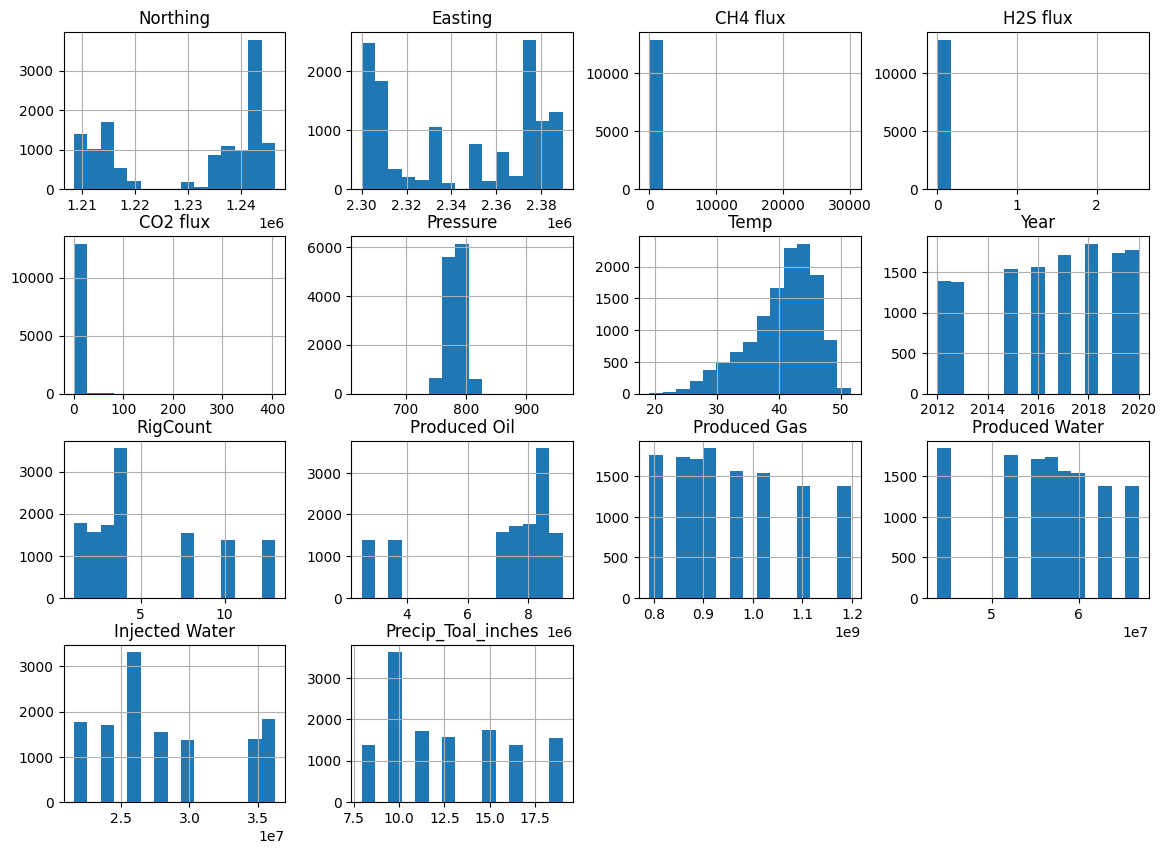

In [43]:
#Histogram - lots of irregularity
all_data.hist(bins = 15, figsize = (14, 10))
plt.show()

**Correlations**

In [44]:
#First Looking At if Methane Flux has any relationship to other variables
corr_matrix = all_data.corr(numeric_only = True)
corr_matrix

,Northing,Easting,CH4 flux,H2S flux,CO2 flux,Pressure,Temp,Year,RigCount,Produced Oil,Produced Gas,Produced Water,Injected Water,Precip_Toal_inches
Northing,1.000000,0.911459,0.016781,-0.035925,-0.021234,-0.676399,-0.017465,0.009328,-0.005433,0.008705,-0.007385,-0.007994,0.001632,-0.001530
Easting,0.911459,1.000000,0.006786,-0.029393,-0.023343,-0.533361,-0.014690,-0.015281,0.020699,-0.019462,0.018657,0.011253,0.018191,-0.000093
CH4 flux,0.016781,0.006786,1.000000,0.301118,0.499283,-0.026237,0.006743,0.020262,-0.020387,0.014287,-0.021190,-0.023363,-0.007791,-0.016733
H2S flux,-0.035925,-0.029393,0.301118,1.000000,0.493427,0.033050,0.018631,0.001556,0.000405,0.001805,0.000015,-0.017208,0.018129,-0.010903
CO2 flux,-0.021234,-0.023343,0.499283,0.493427,1.000000,0.003697,-0.000945,0.004282,-0.000756,0.011805,-0.004559,-0.021768,0.007125,-0.019328
Pressure,-0.676399,-0.533361,-0.026237,0.033050,0.003697,1.000000,0.006770,0.024895,-0.027509,0.051770,-0.022930,-0.030213,0.012443,0.026579
Temp,-0.017465,-0.014690,0.006743,0.018631,-0.000945,0.006770,1.000000,0.030356,-0.047029,0.034262,-0.034613,-0.126083,0.086650,-0.090992
Year,0.009328,-0.015281,0.020262,0.001556,0.004282,0.024895,0.030356,1.000000,-0.908153,0.773488,-0.980915,-0.707922,-0.482251,-0.186997
RigCount,-0.005433,0.020699,-0.020387,0.000405,-0.000756,-0.027509,-0.047029,-0.908153,1.000000,-0.754609,0.944963,0.618615,0.582252,0.142931
Produced Oil,0.008705,-0.019462,0.014287,0.001805,0.011805,0.051770,0.034262,0.773488,-0.754609,1.000000,-0.790445,-0.610737,-0.364316,0.212235


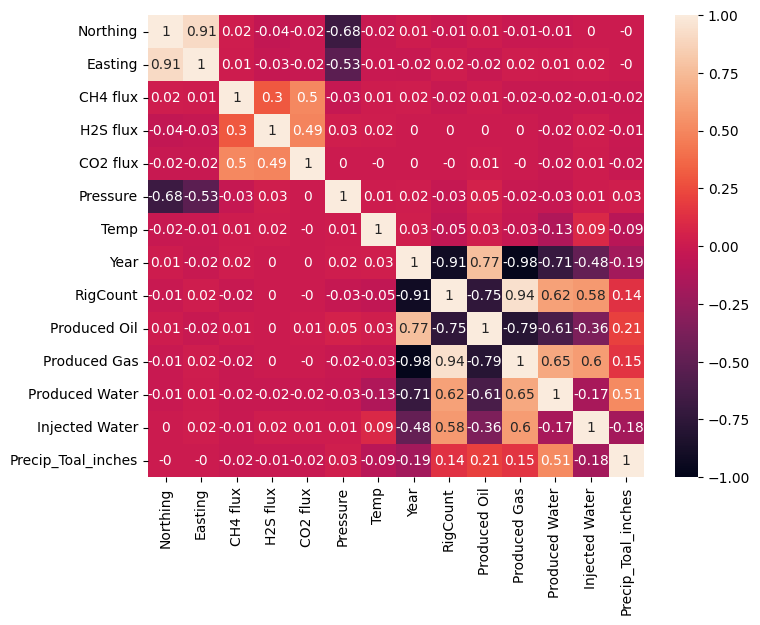

In [45]:
#As a heatmap since some people like these
fig = plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix.round(2), annot = True, vmin = -1, vmax = 1)
plt.show()

`Thoughts on correlation:`
- It's unsurprising that northing & easting are highly correlated since they are coordinates.
- I'm surprised to see coordinates and pressure of the gas are correlated negatively. It would appear as northing goes from south to north, and as easting goes from west to east the pressure of the gas drops. This would indicate the pressure of the gas is higher in places measured in the southwest while lower in the northeast.
- The year being highly correlated with RigCount, O&G production is unsurprising. I'll have to think about how I want to handle this

In [46]:
#Correlation Matrix Just to Methane
corr_matrix_methane = all_data.corr(numeric_only = True)['CH4 flux'][abs(all_data.corr(numeric_only = True)['CH4 flux'])<1]
corr_matrix_methane = corr_matrix_methane.sort_values(ascending = False, key = abs)
print(corr_matrix_methane)

CO2 flux              0.499283
H2S flux              0.301118
Pressure             -0.026237
Produced Water       -0.023363
Produced Gas         -0.021190
RigCount             -0.020387
Year                  0.020262
Northing              0.016781
Precip_Toal_inches   -0.016733
Produced Oil          0.014287
Injected Water       -0.007791
Easting               0.006786
Temp                  0.006743
Name: CH4 flux, dtype: float64


`Thoughts on methane correlation:`
- I'm not seeing a lot of correlation of methane flux rates to some of the variables I was thinking. CO2 and H2S are measured at the same time as methane so it makes sense they are associated. They are likely occurring together.

**Overall Trends in Graphing**

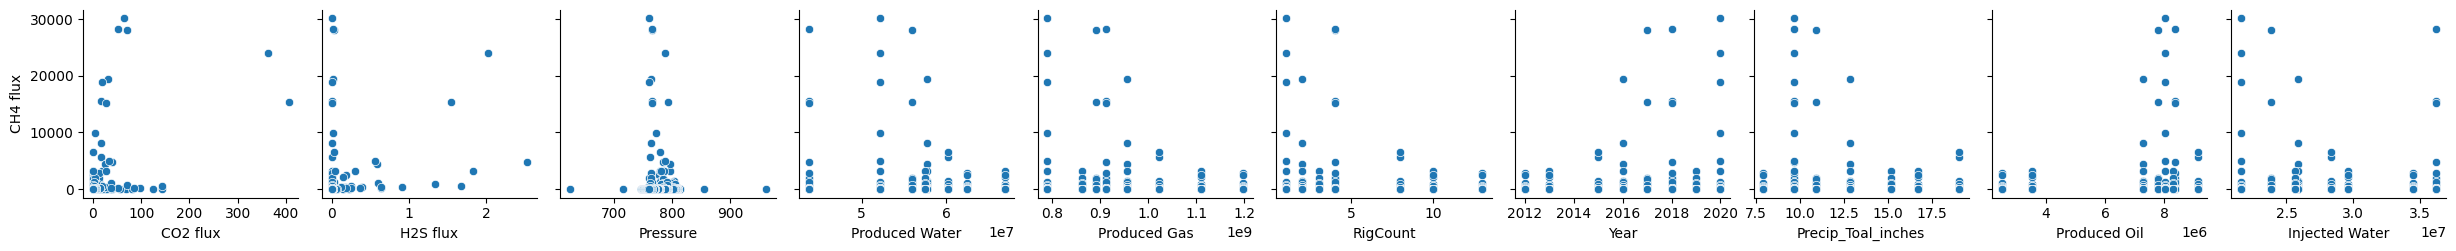

In [47]:
#Pairplot of Methane to Features I Want to Explore More
sns.pairplot(all_data, 
             x_vars = ['CO2 flux', 'H2S flux', 'Pressure', 'Produced Water', 'Produced Gas', 
             'RigCount', 'Year', 'Precip_Toal_inches', 'Produced Oil', 'Injected Water'], 
             y_vars = ['CH4 flux'])
plt.show()

**Maybe by Area could be Interesting**

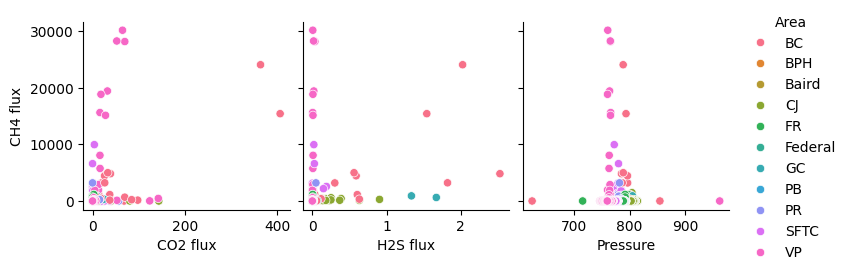

In [48]:
sns.pairplot(all_data, 
             x_vars = ['CO2 flux', 'H2S flux', 'Pressure'], 
             y_vars = ['CH4 flux'], hue = 'Area')
plt.show()

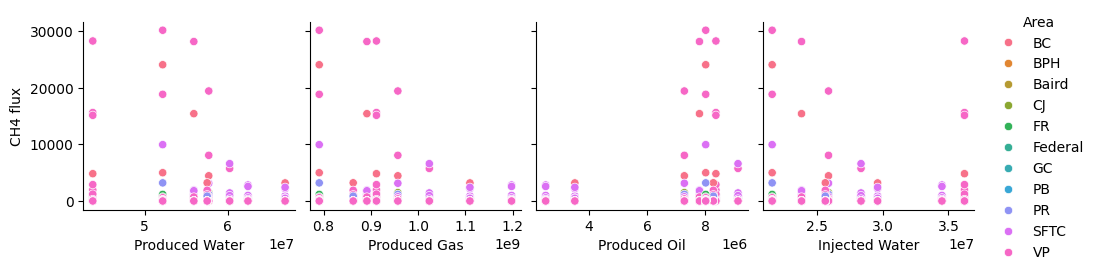

In [49]:
sns.pairplot(all_data, 
             x_vars = ['Produced Water', 'Produced Gas', 'Produced Oil', 'Injected Water'], 
             y_vars = ['CH4 flux'], hue = 'Area')
plt.show()

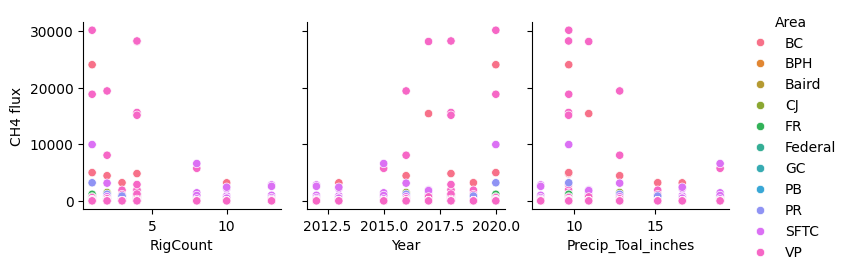

In [50]:
sns.pairplot(all_data, 
             x_vars = ['RigCount', 'Year', 'Precip_Toal_inches'], 
             y_vars = ['CH4 flux'], hue = 'Area')
plt.show()

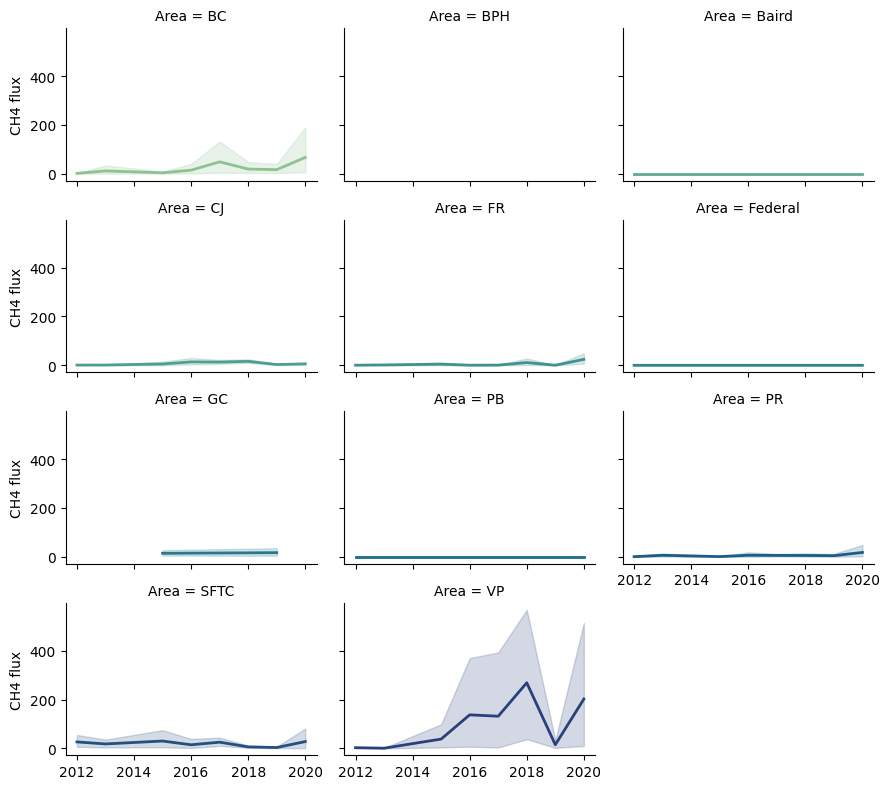

In [51]:
#Plots of All the Areas Over Time
g = sns.relplot(
    data=all_data,
    x="Year", y="CH4 flux", col="Area", hue="Area",
    kind="line", palette="crest", linewidth=2, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
g.set_axis_labels("", "CH4 flux")
g.tight_layout()

`Thoughts`:
- It appears that some areas monitored have no change in CH4 flux and some areas vary greatly. VP, SFTC, & BC seem to have the most going on.

**Looking at Just Annual Averages**

In [52]:
all_data.columns

Index(['Site Pt', 'Area', 'Northing', 'Easting', 'CH4 flux', 'H2S flux',
       'CO2 flux', 'Pressure', 'Temp', 'Year', 'RigCount', 'Produced Oil',
       'Produced Gas', 'Produced Water', 'Injected Water',
       'Precip_Toal_inches'],
      dtype='object')

In [53]:
#Grouping By Area & Year
grouped_annual = all_data.drop(columns = ['Site Pt', 'Northing', 'Easting']).groupby(['Year', 'Area'], observed = False).mean().reset_index()
grouped_annual.head()

,Year,Area,CH4 flux,H2S flux,CO2 flux,Pressure,Temp,RigCount,Produced Oil,Produced Gas,Produced Water,Injected Water,Precip_Toal_inches
0,2012,BC,1.452151,0.002036,0.745675,786.476661,40.224841,13.0,2517228.0,1.197367e+09,62429055.0,34505411.0,7.92
1,2012,BPH,2.072883,0.003606,0.318325,771.767526,41.248454,13.0,2517228.0,1.197367e+09,62429055.0,34505411.0,7.92
2,2012,Baird,0.000000,0.001139,0.099618,784.808000,35.888000,13.0,2517228.0,1.197367e+09,62429055.0,34505411.0,7.92
3,2012,CJ,0.864706,0.003099,2.127565,796.442529,39.551724,13.0,2517228.0,1.197367e+09,62429055.0,34505411.0,7.92
4,2012,FR,0.400145,0.001930,0.505787,783.264368,36.762069,13.0,2517228.0,1.197367e+09,62429055.0,34505411.0,7.92


In [54]:
corr_matrix_methane_year = grouped_annual.corr(numeric_only = True)['CH4 flux'][abs(grouped_annual.corr(numeric_only = True)['CH4 flux'])<1]
corr_matrix_methane_year = corr_matrix_methane_year.sort_values(ascending = False, key = abs)
print(corr_matrix_methane_year)

CO2 flux              0.525247
Pressure             -0.491289
Produced Water       -0.260449
Produced Gas         -0.221524
RigCount             -0.219104
Year                  0.216447
Produced Oil          0.164595
Precip_Toal_inches   -0.144648
H2S flux              0.098431
Injected Water       -0.069144
Temp                  0.055088
Name: CH4 flux, dtype: float64


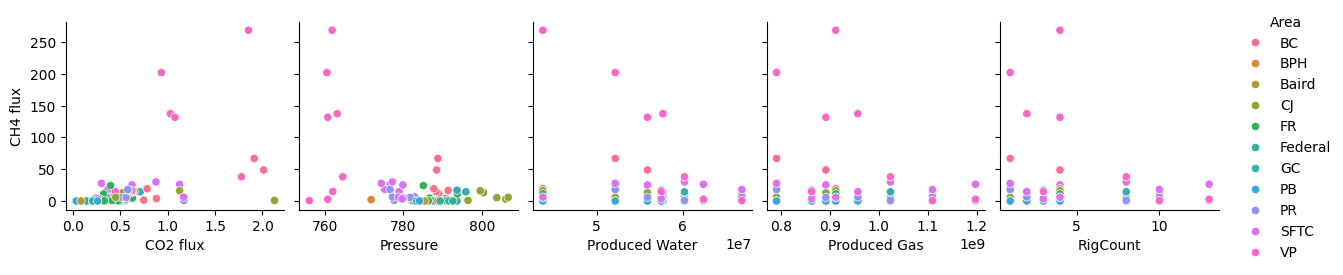

In [55]:
sns.pairplot(grouped_annual, 
             x_vars = ['CO2 flux', 'Pressure', 'Produced Water', 'Produced Gas', 'RigCount'], 
             y_vars = ['CH4 flux'], hue = 'Area')
plt.show()

<Axes: xlabel='Year', ylabel='CH4 flux'>

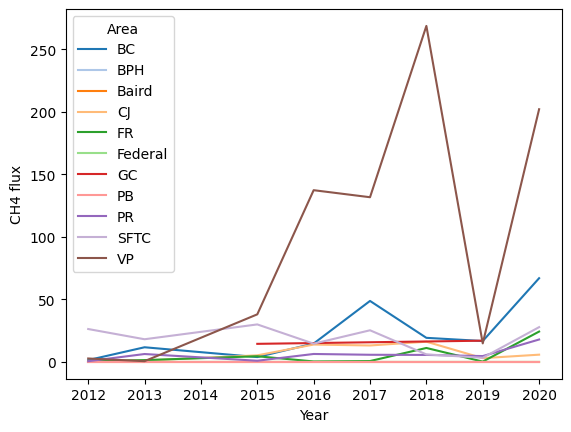

In [56]:
sns.lineplot(data=grouped_annual, x = 'Year', y = 'CH4 flux', hue = 'Area', palette="tab20", linewidth=1.5)

**Separating Out VP, BC, & SFTC**

In [57]:
small_set = grouped_annual[grouped_annual['Area'].isin(['VP', 'BC', 'SFTC'])].copy().reset_index()

In [58]:
small_set_corr = small_set.corr(numeric_only = True)['CH4 flux'][abs(small_set.corr(numeric_only = True)['CH4 flux'])<1]
small_set_corr = small_set_corr.sort_values(ascending = False, key = abs)
print(small_set_corr)

CO2 flux              0.494597
Pressure             -0.469431
Produced Water       -0.456353
index                 0.396241
Produced Gas         -0.367744
RigCount             -0.366359
Year                  0.356085
Precip_Toal_inches   -0.282036
Produced Oil          0.276852
Injected Water       -0.095807
Temp                 -0.043328
H2S flux              0.008792
Name: CH4 flux, dtype: float64


`Thoughts`: It's seeming like the impact of the factors may depend upon the location. Methane flux is location dependent first then may be correlated more strongly with other factors such as Pressure, Produced Water volumes, Produced Gas volumes, Rig Counts, etc.

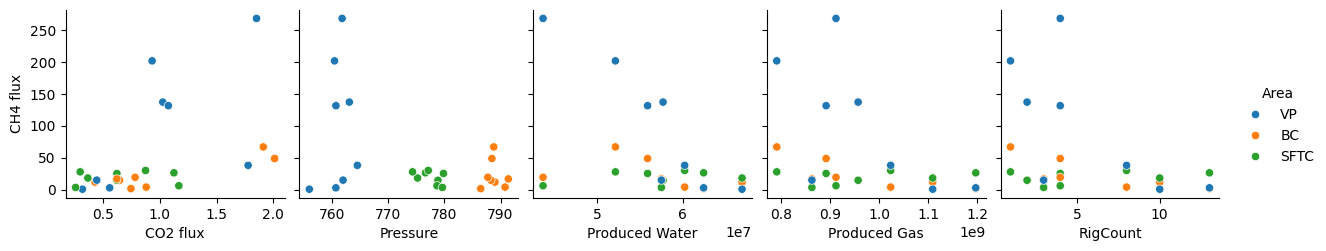

In [59]:
small_set['Area'] = pd.Categorical(small_set['Area'], categories=['VP', 'BC', 'SFTC'])
sns.pairplot(small_set, 
             x_vars = ['CO2 flux', 'Pressure', 'Produced Water', 'Produced Gas', 'RigCount'], 
             y_vars = ['CH4 flux'], hue = 'Area')
plt.show()

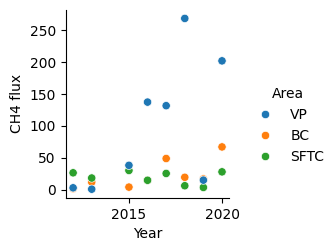

In [60]:
sns.pairplot(small_set, 
             x_vars = ['Year'], 
             y_vars = ['CH4 flux'], hue = 'Area')
plt.show()

### Building Out a Random Forest Model

**Separating Out Training & Testing Data**
- Beauty of using a RandomForest method is that no scaling of data is needed nor dummy encoding of the categorical variables
- I do need to drop some variables that will not be needed for this

In [61]:
all_data_forest = all_data.copy().drop(columns = ['Site Pt', 'Northing', 'Easting'])

In [62]:
all_data_forest= pd.get_dummies(all_data_forest, drop_first = True)

In [63]:
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [64]:
X = all_data_forest.drop(columns = 'CH4 flux')
y = all_data_forest['CH4 flux']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 81301)

**Baseline RandomForest Model**

In [65]:
methane_rf = RandomForestRegressor(random_state = 0)
methane_rf_cv = cross_validate(methane_rf, 
                               X_train, 
                               y_train, 
                               scoring = ['neg_root_mean_squared_error', 'r2'],
                               cv = 5,
                               return_train_score = True)

print(f'RMSE Test Forest: {-methane_rf_cv["test_neg_root_mean_squared_error"].mean().round(2)}')
print(f'RMSE Train Forest: {-methane_rf_cv["train_neg_root_mean_squared_error"].mean().round(2)}')
print(f'SD of All Training Data: {y_train.std().round(2)}')
print(f'R2 Test with Forest: {methane_rf_cv["test_r2"].mean().round(2)}')

RMSE Test Forest: 495.34
RMSE Train Forest: 216.37
SD of All Training Data: 663.57
R2 Test with Forest: -3.96


In [66]:
methane_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

`Thoughts:` If looking at RMSE vs. SD,this model performs better than just randomly picking the mean of the data (RMSE of the testing data from the cross-validated folds is better than the SD). However, the R2 is absolutely terrible and indicates the opposite. It indicates the model is worse than just using the mean as a prediction for all observations. Maybe we can get better if we tune it?

**Using RandomizedSearch to tune hyperparameters**

In [68]:
param_options = [{'bootstrap': [True, False],
                  'max_depth':[None, 2, 5, 10, 20, 50, 100],
                  'max_features': [None, 'sqrt'],
                  'n_estimators': [100, 200, 300, 400, 500],
                  'min_samples_leaf': [1, 3, 5, 10],
                  'min_samples_split': [2, 5, 10, 15, 20, 50]}]

methane_rf_search = RandomizedSearchCV(estimator = methane_rf,
                                       param_distributions = param_options,
                                       n_iter = 20,
                                       cv = 3,
                                       random_state = 81301)

search_forest = methane_rf_search.fit(X_train, y_train)

In [69]:
search_forest.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5,
 'bootstrap': False}

**Running the Tuned RandomForest Model**

In [71]:
methane_tuned_rf_cv = cross_validate(search_forest.best_estimator_, 
                               X_train, 
                               y_train, 
                               scoring = ['neg_root_mean_squared_error', 'r2'],
                               cv = 5,
                               return_train_score = True)

print(f'RMSE Test Tuned Forest: {-methane_tuned_rf_cv["test_neg_root_mean_squared_error"].mean().round(2)}')
print(f'RMSE Train Tuned Forest: {-methane_tuned_rf_cv["train_neg_root_mean_squared_error"].mean().round(2)}')
print(f'SD of All Training Data: {y_train.std().round(2)}')
print(f'R2 Test with Tuned Forest: {methane_tuned_rf_cv["test_r2"].mean().round(2)}')

RMSE Test Tuned Forest: 506.39
RMSE Train Tuned Forest: 289.32
SD of All Training Data: 663.57
R2 Test with Tuned Forest: -0.92


`Thoughts`: It's honestly still a terrible model. I'll run it on the testing data & then maybe try one more thing.

In [72]:
y_pred = search_forest.best_estimator_.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Tuned RandomForest R2 on Test Data: {r2.round(2)}')
print(f'Tuned RandomForest RMSE on Test Data: {rmse.round(2)}')
print(f'SD of Test Data: {y_test.std().round(2)}')

Tuned RandomForest R2 on Test Data: 0.5
Tuned RandomForest RMSE on Test Data: 271.16
SD of Test Data: 384.54


`Thoughts`: The tuned RandomForest Model actually did really pretty good on the testing data, way better than the training data.

In [ ]:
dict(zip(X_train.columns, np.round(search_forest.best_estimator_.feature_importances_, 3)))

### Area Specific Model

I have a theory that the models don't generalize well to the entire region, but perhaps they could do really well on predicting the rate of methane flux in one specific measured area. I'm going to build a model just on the data from VP region and see what happens.

In [78]:
VP_data = all_data[all_data['Area'].isin(['VP'])].copy()
VP_data = VP_data.drop(columns = ['Site Pt', 'Area'])

X = VP_data.drop(columns = 'CH4 flux')
y = VP_data['CH4 flux']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 81301)

In [79]:
VP_rf = RandomForestRegressor(random_state = 0)
VP_rf_cv = cross_validate(VP_rf, 
                               X_train, 
                               y_train, 
                               scoring = ['neg_root_mean_squared_error', 'r2'],
                               cv = 5,
                               return_train_score = True)

print(f'VP RMSE Test Forest: {-VP_rf_cv["test_neg_root_mean_squared_error"].mean().round(2)}')
print(f'VP RMSE Train Forest: {-VP_rf_cv["train_neg_root_mean_squared_error"].mean().round(2)}')
print(f'VP SD of All Training Data: {y_train.std().round(2)}')
print(f'VP R2 Test with Forest: {VP_rf_cv["test_r2"].mean().round(2)}')

VP RMSE Test Forest: 883.8
VP RMSE Train Forest: 365.59
VP SD of All Training Data: 1593.98
VP R2 Test with Forest: 0.54


`Thoughts`: Just the standard model without any parameter tuning on just a single Area's data does signficantly better than the model generalizing the entire region of measurement.

**VP Tuned Model**

In [80]:
param_options = [{'bootstrap': [True, False],
                  'max_depth':[None, 2, 5, 10, 20, 50, 100],
                  'max_features': [None, 'sqrt'],
                  'n_estimators': [100, 200, 300, 400, 500],
                  'min_samples_leaf': [1, 3, 5, 10],
                  'min_samples_split': [2, 5, 10, 15, 20, 50]}]

VP_rf_search = RandomizedSearchCV(estimator = VP_rf,
                                       param_distributions = param_options,
                                       n_iter = 20,
                                       cv = 3,
                                       random_state = 81301)

search_forest = VP_rf_search.fit(X_train, y_train)

In [81]:
search_forest.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 100,
 'bootstrap': True}

In [82]:
VP_tuned_rf_cv = cross_validate(search_forest.best_estimator_, 
                               X_train, 
                               y_train, 
                               scoring = ['neg_root_mean_squared_error', 'r2'],
                               cv = 5,
                               return_train_score = True)

print(f'VP RMSE Test Tuned Forest: {-VP_tuned_rf_cv["test_neg_root_mean_squared_error"].mean().round(2)}')
print(f'VP RMSE Train Tuned Forest: {-VP_tuned_rf_cv["train_neg_root_mean_squared_error"].mean().round(2)}')
print(f'VP SD of All Training Data: {y_train.std().round(2)}')
print(f'VP R2 Test with Tuned Forest: {VP_tuned_rf_cv["test_r2"].mean().round(2)}')

VP RMSE Test Tuned Forest: 1079.62
VP RMSE Train Tuned Forest: 925.72
VP SD of All Training Data: 1593.98
VP R2 Test with Tuned Forest: 0.28


In [83]:
y_pred = search_forest.best_estimator_.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'VP Tuned RandomForest R2 on Test Data: {r2.round(2)}')
print(f'VP Tuned RandomForest RMSE on Test Data: {rmse.round(2)}')
print(f'VP SD of Test Data: {y_test.std().round(2)}')

VP Tuned RandomForest R2 on Test Data: 0.11
VP Tuned RandomForest RMSE on Test Data: 1097.81
VP SD of Test Data: 1166.01


In [85]:
dict(zip(X_train.columns, np.round(search_forest.best_estimator_.feature_importances_, 3)))

{'Northing': 0.0,
 'Easting': 0.003,
 'H2S flux': 0.01,
 'CO2 flux': 0.986,
 'Pressure': 0.0,
 'Temp': 0.001,
 'Year': 0.0,
 'RigCount': 0.0,
 'Produced Oil': 0.0,
 'Produced Gas': 0.0,
 'Produced Water': 0.0,
 'Injected Water': 0.0,
 'Precip_Toal_inches': 0.0}

### Conclusions

### Sources

**Sources**

The Bureau of Land Management (BLM) San Juan Field Office. December, 1999. Coalbed Methane Development in the Northern San Juan Basin of Colorado, A Brief History and Environmental Observations. https://ecmc.state.co.us/documents/library/AreaReports/SanJuanBasin/SanJuan_BLM.pdf.

Kort, EA, Frankenberg, C, Costigan, KR, Lindenmaier, R, Dubey, MK, Wunch, D. 2014. Four corners: The largest US methane anomaly viewed from space. Geophys Res Lett 41: 6898–6903. DOI: http://dx. doi.org/10.1002/2014GL061503.

WSP. 2021. 2020 Fruitland Outcrop Monitoring Report. Colorado Energy & Carbon Management Commission. https://ecmc.state.co.us/documents/library/AreaReports/SanJuanBasin/3m_project/2020%20Fruitland%20Outcrop%20Monitoring%20Report.pdf.

Petron, G, et al. 2020. Investigating large methane enhancements in the U.S. San Juan Basin. Elem Sci Anth, 8: XX. DOI: https://doi.org/ 10.1525/elementa.038.

Environmental Protection Agency. April 11, 2024. Overview of Greenhouse Gases. https://www.epa.gov/ghgemissions/overview-greenhouse-gases#methane.

**Data Sources**
- *Methane Measurement*: https://ecmc.state.co.us/library.html#/areareports&gsc.tab=0
- *Water Well Levels*: https://cida.usgs.gov/ngwmn/index.jsp
- *Colorado O&G Production*: https://ecmc.state.co.us/data.html#/cogis
- *NM O&G Production*: https://www.emnrd.nm.gov/ocd/ocd-data/statistics/
- *Drilling Rig Data*: https://rigcount.bakerhughes.com/na-rig-count
- *Precipitation*: https://raws.dri.edu/coF.html & https://raws.dri.edu/cgi-bin/rawMAIN.pl?coCMES & https://raws.dri.edu/cgi-bin/rawMAIN.pl?coCLOG